In [4]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [12]:
df = pd.read_csv(r"D:\Machine Learning 100 days\Day_32_binning_and_binarization\train.csv",usecols=['Age','Fare','Survived'])

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
#drop missing values
df.dropna(inplace=True)

In [22]:
df.shape

(714, 3)

# without bining we will see result

In [25]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [31]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [33]:
y_train.head()

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [37]:
clf = DecisionTreeClassifier()

In [39]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [43]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6386737089201878)

# Now we will see result after doing bining

In [48]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [50]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [52]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [56]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [58]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [60]:
trf.named_transformers_['first'].n_bins_

array([15])

In [64]:
trf.named_transformers_['second'].n_bins_

array([15])

In [66]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [68]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [70]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [72]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [74]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
544,50.0,13.0,106.4250,13.0,"(47.0, 54.0]","(76.292, 108.9]"
400,39.0,11.0,7.9250,3.0,"(38.0, 42.0]","(7.896, 8.158]"
574,16.0,2.0,8.0500,3.0,"(6.0, 16.0]","(7.896, 8.158]"
581,39.0,11.0,110.8833,14.0,"(38.0, 42.0]","(108.9, 512.329]"
780,13.0,1.0,7.2292,0.0,"(6.0, 16.0]","(0.0, 7.25]"


In [76]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [78]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [80]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6289514866979655)

# common function just need to pass arguments

In [89]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")


    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6303208137715179


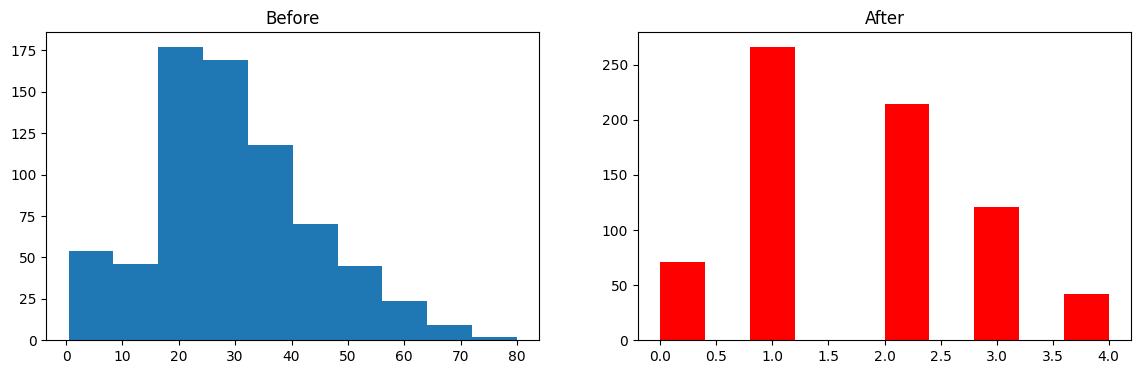

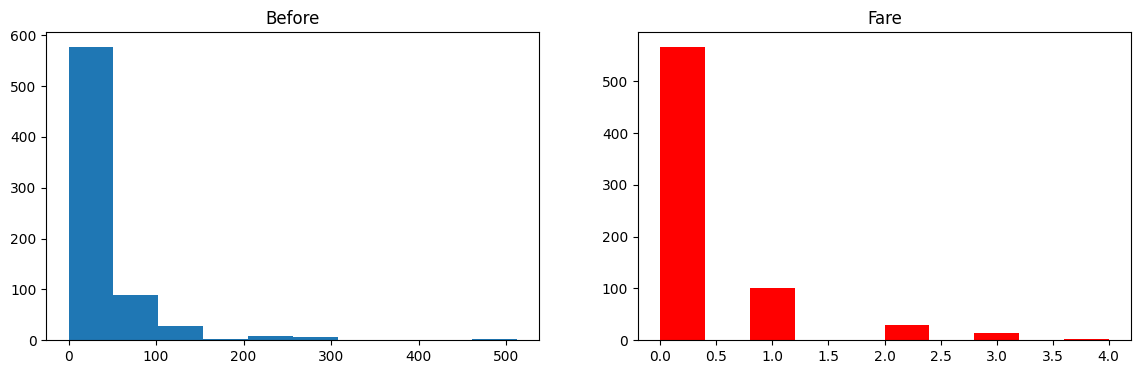

In [91]:
discretize(5,'kmeans')

0.6246870109546165


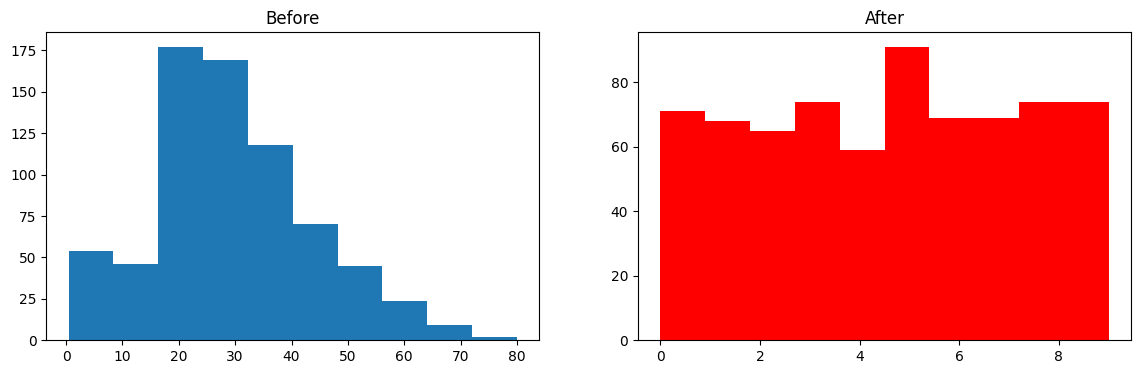

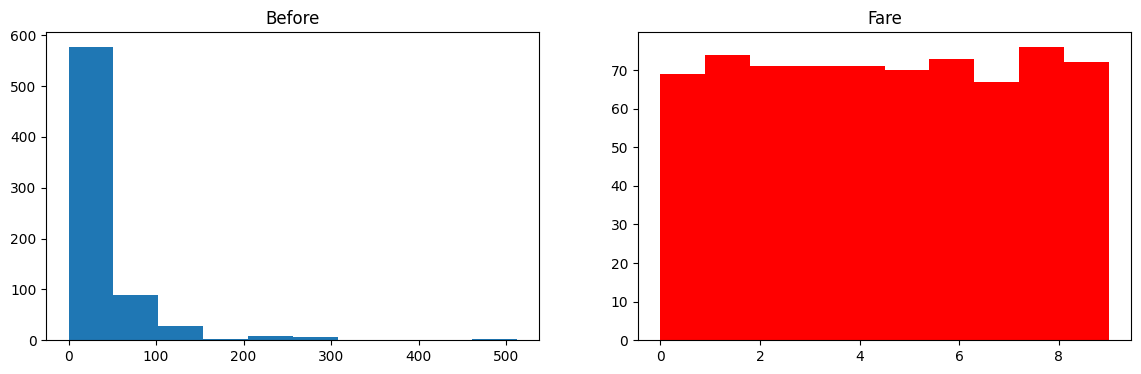

In [95]:
discretize(10,'quantile')

0.6372848200312988


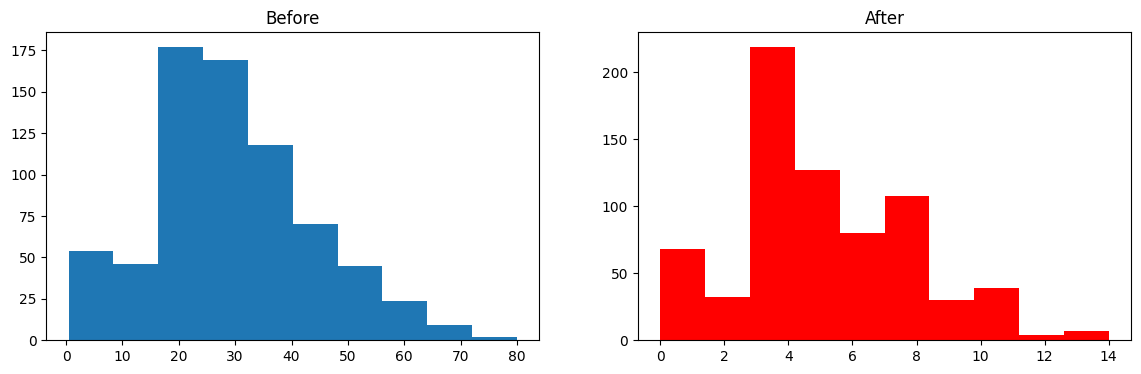

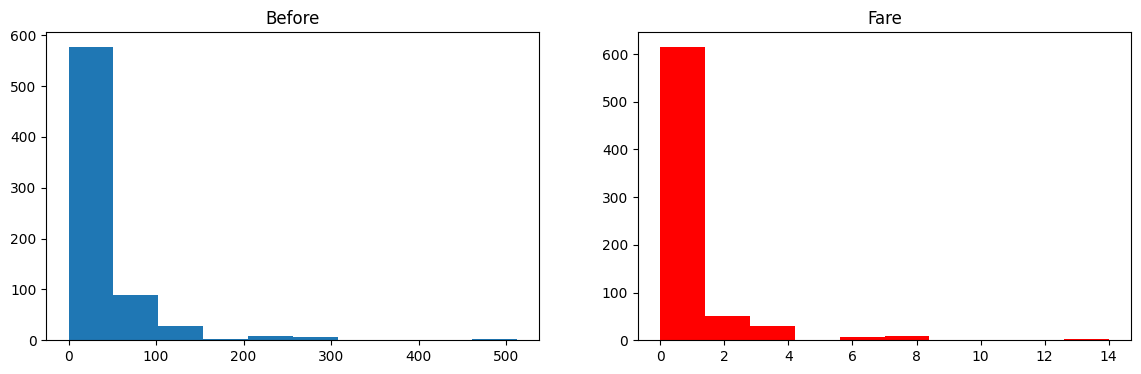

In [99]:
discretize(15,'uniform')